<a href="https://colab.research.google.com/github/sidtanya/Muton/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B8_1_2_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Работа с данными
import pandas as pd
import numpy as np

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# Машинное обучение
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
)

Ниже перечислены все библиотеки, которые применяются в работе, и их назначение.

**1. pandas**
Используется для загрузки, хранения и обработки табличных данных  
(чтение, фильтрация, статистика, работа с колонками).

**2. numpy**
Базовая библиотека для численных вычислений: массивы, математические операции.

**3. matplotlib.pyplot**
Основная библиотека для построения графиков (линейные графики, гистограммы, scatter-плоты).

**4. seaborn**
Надстройка над matplotlib.  
Позволяет строить более красивые и информативные графики (heatmap, pairplot, regplot и т.д.).

**5. scikit-learn (sklearn)**  
Используется для построения моделей машинного обучения.

*Основные модули:*

- **train_test_split** — разделение данных на обучающую и тестовую выборки;
- **StandardScaler** — нормализация признаков;
- **LinearRegression** — линейная регрессия;
- **r2_score, mean_absolute_error, mean_squared_error** — оценка качества модели;
- другие инструменты для предсказаний и анализа.

In [10]:
# Загрузка файла
df = pd.read_csv("/content/drive/MyDrive/Итоговый проект/heart3.csv")

# Описательные статистики

### **Центральные тенденции**

Для всех числовых признаков вычислите:

- среднее (mean);
- медиану (median);
- моду (mode).


---


Оформите всё в виде таблицы.  
Сделайте вывод: где среднее и медиана различаются сильнее всего.

In [14]:
mean_vals = df.mean(numeric_only=True)
median_vals = df.median(numeric_only=True) # допишите код
mode_vals = df.mode(numeric_only=True).iloc[0] # допишите код

summary = pd.DataFrame({
    "Среднее": mean_vals , # допишите код
    "Медиана": median_vals , # допишите код
    "Мода": mode_vals
})

summary

,Среднее,Медиана,Мода
Бронхиальная астма,0.043203,0.000000,0.000000
Возраст алког,32.206533,20.000000,20.000000
Работа,0.523709,1.000000,1.000000
Переломы,0.353003,0.000000,0.000000
Время пробуждения,6.819810,7.000000,6.000000
ЛПВП,1.070095,1.110000,1.180000
Выход на пенсию,0.335090,0.000000,0.000000
Холестерин,5.868599,5.200000,5.000000
Артериальная гипертония,0.485774,0.000000,0.000000
Триглицериды,2.043393,1.480000,0.710000


**Выводы (дописать):**

По результатам расчёта среднего, медианы и моды видно, что для многих признаков среднее и медиана существенно различаются, например, **Возраст алког** и **Возраст курения**. Это обычно говорит о наличии выбросов.


Такие расхождения подтверждают, что данные содержат признаки с **асимметричными распределениями**, где среднее — неустойчивый показатель, а медиана лучше отражает реальное «центральное» значение.


### **Разброс данных**

Вычислите:

- стандартное отклонение (std);
- дисперсию (var);
- коэффициент вариации;
- размах значений.

Оформите результат в таблицу.  
Сделайте вывод: какие признаки имеют наибольший разброс значений.

In [17]:
std_vals = df.std(numeric_only=True) # допишите код
var_vals = df.var(numeric_only=True) # допишите код
cv_vals = df.std(numeric_only=True) / df.mean(numeric_only=True)
range_vals = df.max(numeric_only=True) - df.min(numeric_only=True)

dispersion_summary = pd.DataFrame({
    "Стандртное отклонение": std_vals,
    "Дисперсия": var_vals , # допишите код
    "Коэффициент вариации": cv_vals , # допишите код
    "Размах": range_vals
})

dispersion_summary

,Стандртное отклонение,Дисперсия,Коэффициент вариации,Размах
Бронхиальная астма,0.203422,0.041380,4.708471,1.000000
Возраст алког,26.942616,725.904556,0.836557,84.000000
Работа,0.499701,0.249701,0.954157,1.000000
Переломы,0.478156,0.228633,1.354537,1.000000
Время пробуждения,1.364942,1.863067,0.200144,12.000000
ЛПВП,0.368732,0.135963,0.344579,2.470000
Выход на пенсию,0.472271,0.223040,1.409386,1.000000
Холестерин,1.667100,2.779224,0.284071,5.600000
Артериальная гипертония,0.500061,0.250061,1.029410,1.000000
Триглицериды,1.704405,2.904996,0.834105,14.090000


from matplotlib import pyplot as plt
dispersion_summary['Стандртное отклонение'].plot(kind='hist', bins=20, title='Стандртное отклонение')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dispersion_summary['Дисперсия'].plot(kind='hist', bins=20, title='Дисперсия')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dispersion_summary['Коэффициент вариации'].plot(kind='hist', bins=20, title='Коэффициент вариации')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dispersion_summary['Размах'].plot(kind='hist', bins=20, title='Размах')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dispersion_summary.plot(kind='scatter', x='Стандртное отклонение', y='Дисперсия', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dispersion_summary.plot(kind='scatter', x='Дисперсия', y='Коэффициент вариации', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dispersion_summary.plot(kind='scatter', x='Коэффициент вариации', y='Размах', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dispersion_summary['Стандртное отклонение'].plot(kind='line', figsize=(8, 4), title='Стандртное отклонение')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dispersion_summary['Дисперсия'].plot(kind='line', figsize=(8, 4), title='Дисперсия')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dispersion_summary['Коэффициент вариации'].plot(kind='line', figsize=(8, 4), title='Коэффициент вариации')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dispersion_summary['Размах'].plot(kind='line', figsize=(8, 4), title='Размах')
plt.gca().spines[['top', 'right']].set_visible(False)

**Выводы (дописать):**

Разброс значений в датасете сильно различается между признаками.

Наибольшую изменчивость показывают переменные Национальность, Религия, Семья, Алкоголь, Их значения распределены очень неравномерно.

Наименьший разброс наблюдается у ...

В целом, признаки с большим разбросом требуют нормализации перед моделированием, чтобы избежать доминирования над переменными с низкой вариативностью.








### **Положение данных**

Для каждого числового признака вычислите:

- минимум (min);
- максимум (max);  
- 1-й, 2-й и 3-й квартили (quantile).

Сгруппируйте всё в таблицу.  
Сделайте вывод: есть ли признаки, которые сильно растянуты вдоль оси.

In [18]:
min_vals = df.min(numeric_only=True)
max_vals = df.max(numeric_only=True) # допишите код
q1_vals = df.quantile(0.25, numeric_only=True)
q2_vals = df.quantile(0.5, numeric_only=True) # допишите код
q3_vals = df.quantile(0.75, numeric_only=True)# допишите код

position_summary = pd.DataFrame({
    "Минимум": min_vals,
    "1 квартиль (25%)": q1_vals , # допишите код
    "2 квартиль (50%, медиана)": q2_vals,
    "3 квартиль (75%)": q3_vals , # допишите код
    "Максимум": max_vals
})

position_summary

,Минимум,1 квартиль (25%),"2 квартиль (50%, медиана)",3 квартиль (75%),Максимум
Бронхиальная астма,0.000000,0.000000,0.000000,0.000000,1.000000
Возраст алког,6.000000,18.000000,20.000000,25.000000,90.000000
Работа,0.000000,0.000000,1.000000,1.000000,1.000000
Переломы,0.000000,0.000000,0.000000,1.000000,1.000000
Время пробуждения,0.000000,6.000000,7.000000,8.000000,12.000000
ЛПВП,-0.680000,0.850000,1.110000,1.340000,1.790000
Выход на пенсию,0.000000,0.000000,0.000000,1.000000,1.000000
Холестерин,3.600000,4.500000,5.200000,7.300000,9.200000
Артериальная гипертония,0.000000,0.000000,0.000000,1.000000,1.000000
Триглицериды,0.210000,0.860000,1.480000,2.690000,14.300000


from matplotlib import pyplot as plt
position_summary['Минимум'].plot(kind='hist', bins=20, title='Минимум')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
position_summary['1 квартиль (25%)'].plot(kind='hist', bins=20, title='1 квартиль (25%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
position_summary['2 квартиль (50%, медиана)'].plot(kind='hist', bins=20, title='2 квартиль (50%, медиана)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
position_summary['3 квартиль (75%)'].plot(kind='hist', bins=20, title='3 квартиль (75%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
position_summary.plot(kind='scatter', x='Минимум', y='1 квартиль (25%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
position_summary.plot(kind='scatter', x='1 квартиль (25%)', y='2 квартиль (50%, медиана)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
position_summary.plot(kind='scatter', x='2 квартиль (50%, медиана)', y='3 квартиль (75%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
position_summary.plot(kind='scatter', x='3 квартиль (75%)', y='Максимум', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
position_summary['Минимум'].plot(kind='line', figsize=(8, 4), title='Минимум')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
position_summary['1 квартиль (25%)'].plot(kind='line', figsize=(8, 4), title='1 квартиль (25%)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
position_summary['2 квартиль (50%, медиана)'].plot(kind='line', figsize=(8, 4), title='2 квартиль (50%, медиана)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
position_summary['3 квартиль (75%)'].plot(kind='line', figsize=(8, 4), title='3 квартиль (75%)')
plt.gca().spines[['top', 'right']].set_visible(False)

**Выводы (дописать):**

По минимумам, квартилям и максимумам видно, что несколько признаков имеют очень широкий диапазон значений и сильно растянуты вдоль оси. Это в первую очередь кодированные категориальные переменные:Семья и поведенческие показатели:Возраст алког.

Бинарные признаки (0/1) — самые компактные и не имеют растяжения.

В целом, признаки с большим размахом требуют масштабирования перед построением моделей, чтобы их диапазон не доминировал над остальными переменными.








# Корреляция и Линейная регрессия

## Корреляция

**Корреляция** — это статистическая мера, показывающая, насколько сильно и в каком направлении связаны две количественные переменные.

Если при увеличении одной переменной другая тоже увеличивается — связь положительная; если уменьшается — отрицательная.

Коэффициент корреляции обозначается **r** и принимает значения от **–1 до 1**:

| Значение r | Интерпретация связи |
|-------------|--------------------|
| r ≈ 1 | Сильная положительная связь (при росте X растёт Y) |
| r ≈ 0 | Связь отсутствует |
| r ≈ –1 | Сильная отрицательная связь (при росте X уменьшается Y) |


**Виды корреляции:**
- **Пирсон** — измеряет *линейную* зависимость между переменными;  
- **Спирмен** — оценивает, растут ли переменные “вместе” в целом, даже если зависимость не по прямой линии.

**Важно:** корреляция показывает лишь *совместное изменение переменных*, но не доказывает причинно-следственную связь.

## Линейная регрессия

**Линейная регрессия** — один из самых простых и распространённых методов анализа данных.  
Её цель — **предсказать значение одной переменной (целевой)** на основе значений других переменных (признаков).

Математическая модель имеет вид:

**y = b₀ + b₁·x₁ + b₂·x₂ + ... + bₙ·xₙ**

где  
- **y** — предсказываемое значение (целевая переменная);  
- **x₁, x₂, …, xₙ** — признаки (факторы, влияющие на результат);  
- **b₀** — свободный член (точка пересечения с осью Y);  
- **bᵢ** — коэффициенты регрессии, показывающие силу и направление влияния каждого признака.

---

Интерпретация коэффициентов:

- Если **bᵢ > 0** → при увеличении признака значение цели **растёт**.  
- Если **bᵢ < 0** → при увеличении признака значение цели **уменьшается**.  
- Чем больше по модулю **bᵢ**, тем сильнее влияние признака.

---

Пример уравнения регрессии:

**Холестерин = 120 + 1.5 · Возраст + 2.8 · ИМТ**

Интерпретация коэффициентов:

- если **возраст увеличивается на 1 год**, уровень холестерина в среднем повышается на **1.5 единицы**;
- если **ИМТ увеличивается на 1 пункт**, уровень холестерина растёт примерно на **2.8 единицы**;
- число **120** — это базовое значение холестерина у пациента с низким ИМТ и минимальным возрастом  
  (условная точка отсчёта, от которой модель строит прогноз).

Такое уравнение помогает понять вклад каждого признака в итоговый показатель и увидеть,
как изменения входных переменных отражаются на прогнозе модели.

---

Виды линейной регрессии:

1. **Простая линейная регрессия** — один признак → одна цель  
   `y = b₀ + b₁·x`
2. **Множественная линейная регрессия** — несколько признаков → одна цель  
   `y = b₀ + b₁·x₁ + b₂·x₂ + ... + bₙ·xₙ`

---

Почему линейная регрессия важна:

- помогает понять, **какие признаки влияют** на результат;  
- даёт **интерпретируемую модель**, где каждый коэффициент имеет смысл;  
- позволяет **делать прогнозы** и **оценивать взаимосвязи** в данных.

---

## Практическое задание

### Корреляция

Шаг 1. Рассчитайте матрицу корреляции методом Пирсона (`df.corr(method="pearson")`).

In [21]:
corr_pearson = df.corr(numeric_only=True, method="pearson" ) # добавить код
corr_pearson.round(2)

,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ,Продолжительность сна
Бронхиальная астма,1.00,-0.01,-0.06,0.03,-0.02,-0.01,0.06,0.07,0.08,0.04,...,0.03,0.23,-0.09,-0.11,0.07,0.00,0.01,-0.04,0.08,-0.04
Возраст алког,-0.01,1.00,-0.09,-0.04,-0.09,0.04,0.08,0.08,0.04,0.08,...,0.03,0.00,-0.21,-0.04,0.06,0.03,0.04,0.04,0.04,-0.11
Работа,-0.06,-0.09,1.00,-0.06,-0.16,0.07,-0.74,-0.19,-0.19,-0.13,...,-0.04,0.00,0.08,0.14,-0.19,-0.24,-0.03,0.08,-0.22,-0.11
Переломы,0.03,-0.04,-0.06,1.00,-0.01,-0.15,0.07,0.11,0.08,0.08,...,0.01,0.07,0.07,-0.08,0.12,0.01,-0.02,-0.08,0.12,-0.02
Время пробуждения,-0.02,-0.09,-0.16,-0.01,1.00,0.04,0.10,-0.01,0.02,-0.02,...,0.30,-0.10,-0.05,0.05,-0.03,0.04,0.06,-0.02,0.00,0.67
ЛПВП,-0.01,0.04,0.07,-0.15,0.04,1.00,-0.09,-0.45,-0.55,-0.78,...,-0.03,-0.03,-0.28,0.17,-0.57,-0.06,0.01,0.13,-0.58,0.06
Выход на пенсию,0.06,0.08,-0.74,0.07,0.10,-0.09,1.00,0.22,0.23,0.14,...,0.01,-0.00,-0.13,-0.12,0.22,-0.07,0.05,-0.06,0.25,0.08
Холестерин,0.07,0.08,-0.19,0.11,-0.01,-0.45,0.22,1.00,0.73,0.44,...,-0.07,0.07,-0.05,-0.05,0.62,0.07,0.06,-0.05,0.79,0.04
Артериальная гипертония,0.08,0.04,-0.19,0.08,0.02,-0.55,0.23,0.73,1.00,0.56,...,-0.00,0.05,-0.08,-0.06,0.70,0.06,0.08,-0.05,0.88,0.02
Триглицериды,0.04,0.08,-0.13,0.08,-0.02,-0.78,0.14,0.44,0.56,1.00,...,0.01,0.03,-0.05,-0.07,0.43,0.04,0.07,-0.03,0.56,-0.03


**Выводы (дописать):**

Шаг 2. Визуализируйте корреляции с помощью графика `seaborn.heatmap`

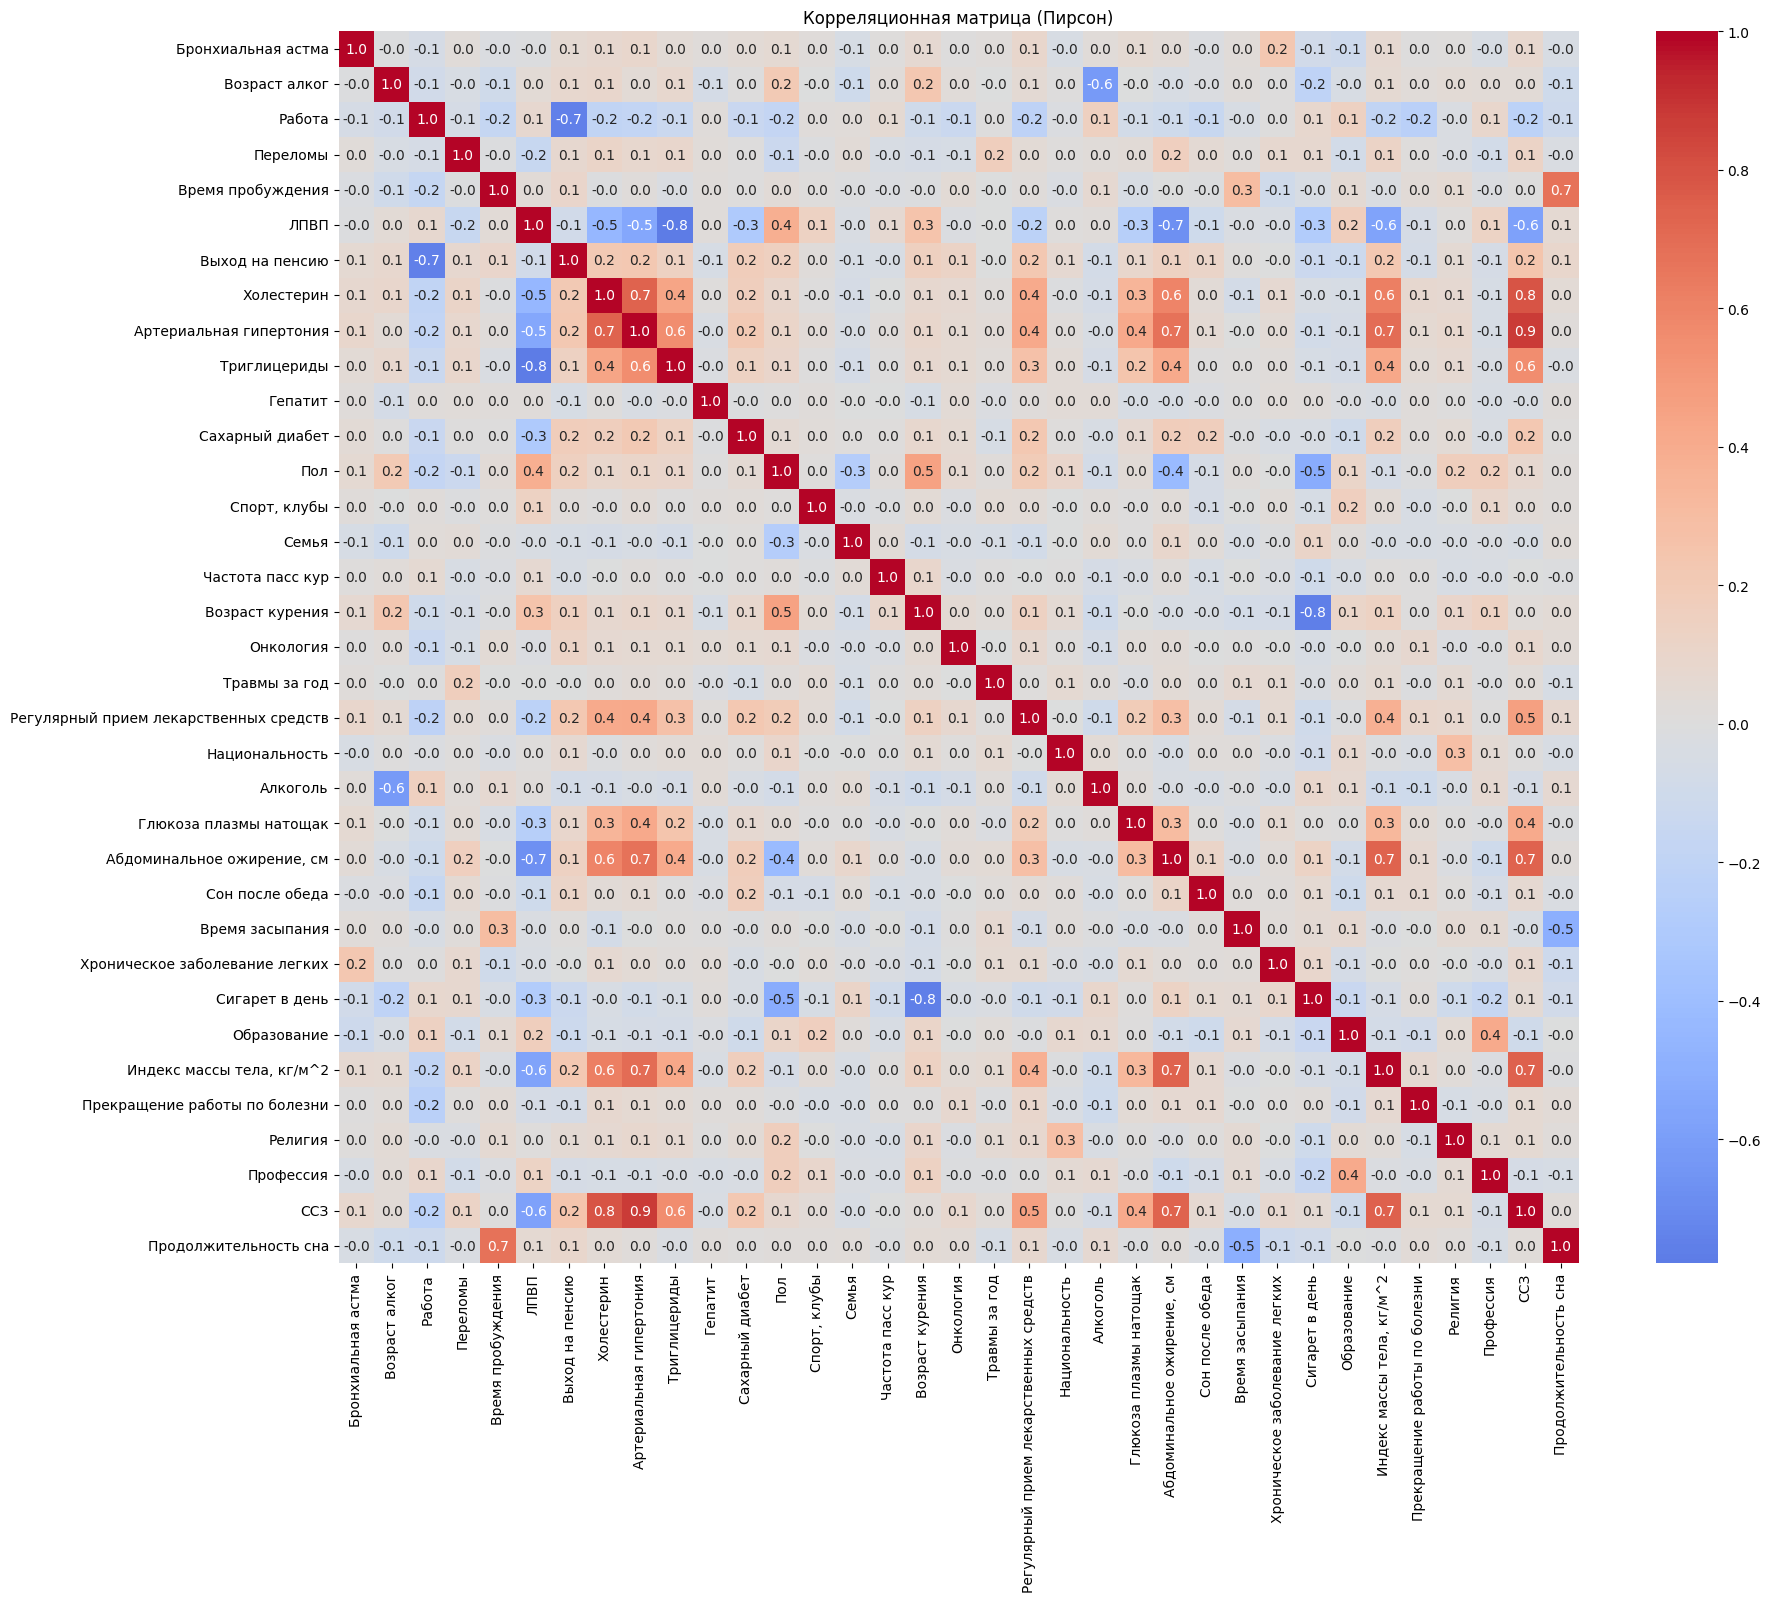

In [24]:
plt.figure(figsize=(20,16))
sns.heatmap(data = corr_pearson , cmap='coolwarm', center=0, annot=True, fmt=".1f") # добавьте после "data =" название матрицы корреляции из предыдущего кода
plt.title("Корреляционная матрица (Пирсон)")
plt.show()

Шаг 3. Проанализируйте связи с целевой переменное (ЛПВП), постройте график barplot с помощью `seaborn.barplot`. С помощью параметра `ascending=False` в функции `sort_values` переделайте график, чтобы расположить столбцы в порядке убывания.

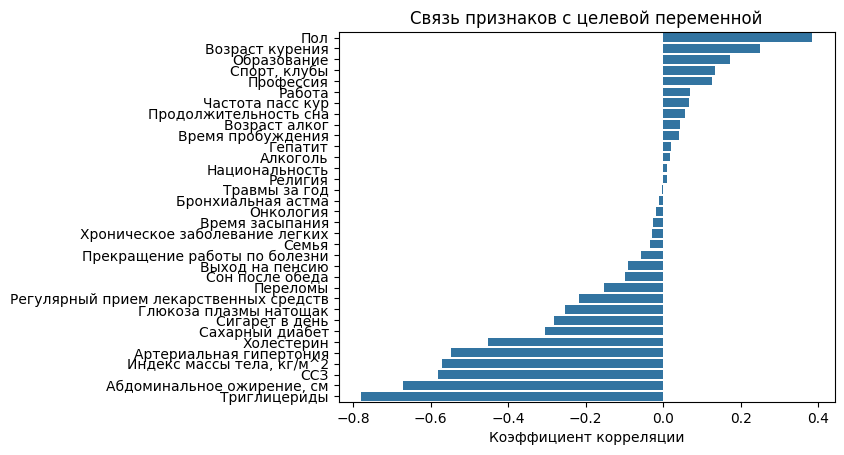

In [25]:
target_corr = corr_pearson["ЛПВП"].drop("ЛПВП").sort_values(ascending=False) # допиши код
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title("Связь признаков с целевой переменной")
plt.xlabel("Коэффициент корреляции")
plt.ylabel("")
plt.show()

**Выводы (дописать):**

Сильные положительные связи:

- ... — наиболее высокая положительная корреляция с целевой переменной.

- ...

Сильные отрицательные связи:

- ... — самая сильная отрицательная корреляция.

- ... — также выраженная отрицательная зависимость: чем больше окружность живота, тем ниже значение целевой переменной.

Шаг 4. Постройте scatter-график с линией тренда (`seaborn.regplot`) для признака с самой сильной корреляцией с признаком "ЛПВП", сделайте вывод о характере связи.
По оси y возьмите признак "ЛПВП", а по оси x признак с самой высокой корреляцией с "ЛПВП" (подсказка: корреляция отрицательная).

In [ ]:
sns.regplot() # добавьте название датасета, x, y
plt.title("Линейная зависимость между триглицеридами и ЛПВП")
plt.show()

**Выводы (дописать):**

На графике видна ярко выраженная ... зависимость между уровнем триглицеридов и ЛПВП

### Линейная регрессия

Шаг 1. Создайте список features

In [ ]:
features = [] # добавьте 'Триглицериды'

target = "ЛПВП" # целевая переменная

Шаг 2. Разделите данные на train/test с помошью `train_test_split`.

In [ ]:
X = df[features].copy()
y = df[target].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42 # random_state=42 для того, чтобы при повторном запуске модели получить тот же результат
)

Шаг 3. Нормализацизуйте признаки используя `StandardScaler`: обучите scaler на train, примените к train и test, сохраните преобразованные данные.


In [ ]:
scaler = StandardScaler()        # создаём объект стандартизации (вычитает среднее, делит на std)
X_train_scaled = scaler.fit_transform(X_train)   # обучаем scaler на train и сразу масштабируем train

X_test_scaled = scaler.transform(X_test)         # масштабируем test теми же параметрами (mean/std)

X_train_s = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
# превращаем масштабированный train в DataFrame с теми же колонками и индексами

X_test_s = pd.DataFrame(X_test_scaled,  columns=features, index=X_test.index)
# то же самое для test

Шаг 4. Обучите модель `LinearRegression()` и получите прогноз на тестовых данных.

In [ ]:
lin = LinearRegression()
lin.fit(X_train_s, y_train)

LinearRegression()

Шаг 5. Выведите уравнение модели, получая коэффициенты `model.coef_` и свободный член `model.intercept_`.

In [ ]:
# Свободный член и коэффициенты
b0 = lin.intercept_
coefs = pd.Series(lin.coef_, index=features)

print("Свободный член (b0):", round(b0, 3))
print()

print("Коэффициенты модели:")
display(coefs.to_frame("Коэффициент").round(3))

# Формирование уравнения модели
terms = [f"{coefs[f]:.3f}·{f}" for f in features]
equation = f"{target} = {b0:.3f} + " + " + ".join(terms)

print("\nУравнение модели:\n")
print(equation)

Шаг 6. Посчитайте метрики оценки качества (R², MAE, RMSE). Сделайте вывод о качестве модели.

In [ ]:
# Предсказания
y_pred = lin.predict(X_test_s)

# Метрики
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"R²   = {r2:.3f}")
print(f"MAE  = {mae:.3f}")
print(f"MSE  = {mse:.3f}")
print(f"RMSE = {rmse:.3f}")
print(f"MAPE = {mape:.3f}")

**Выводы:**
- R² (коэффициент детерминации) Показывает, какую долю вариации целевой переменной объясняет модель. 0.671 → модель объясняет 67.1% изменений ЛПВП.
- MAE 0.182 → в среднем модель ошибается на 0.18 единицы ЛПВП.
- MSE средний квадрат ошибки. Чувствителен к большим отклонениям.
0.048 → небольшие крупные ошибки, модель стабильная.
- RMSE — ошибка в тех же единицах, что и целевая переменная.
0.219 → средняя ошибка примерно 0.22 ЛПВП.
- MAPE... ***напишите вывод***

## *Необязательное задание:*

Попробуйте построить две разные модели регрессии для мужчин и женщин, то есть отдельно для `df_0 = df[df['Пол'] == 0]` и `df_1 = df[df['Пол'] == 1]`. Как это повлияло на качество результата?

Для `df_0 = df[df['Пол'] == 0]`:

In [ ]:
features = ['Триглицериды']

target = "ЛПВП"

df_0 = df[df['Пол'] == 0]

X = df_0[features].copy()
y = df_0[target].copy()

# продолжите код

R²  = 0.777
MAE = 0.136
RMSE = 0.141


Для `df_1 = df[df['Пол'] == 1]`:

In [ ]:
features = ['Триглицериды']

target = "ЛПВП"

df_1 = df[df['Пол'] == 1]

X = df_1[features].copy()
y = df_1[target].copy()

# продолжите код

R²  = 0.901
MAE = 0.097
RMSE = 0.113
